In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import torch

### Fitting a fixed sqrt curve to saccade data from the paper to get a function for amplitude generation

In [212]:
#equation for the velocity-amplitude curve based on main sequence
a_fs=412.256
b_fs=49.036
c_fs=5.000
popt_fs = tuple([a_fs,b_fs,c_fs])

#equation for vel-amp curve for amplitude <6 degrees
a_exp = 368.93816447
b_exp =0.49166436
c_exp = 1.48726886
popt_exp = tuple([a_exp,b_exp,c_exp])

### GENERATING EQUATION FOR MAIN SEQUENCE

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func_exp(x, a = a_exp, b = b_exp, c = c_exp):
  return a * (1 - np.exp(-(x-b)/c))
def func_sigmoid(x,a,b,c):
  return a/(1+(b/x)**c)
def func_fixsqrt(x,a = a_fs,b = b_fs,c = c_fs):
  return a + b*(x-c)**0.5


### Fitting a fixed sqrt curve to saccade data from the paper to get a function for amplitude generation

In [218]:
#equation for the velocity-amplitude curve based on main sequence
a_fs=412.256
b_fs=49.036
c_fs=5.000
popt_fs = tuple([a_fs,b_fs,c_fs])

#equation for vel-amp curve for amplitude <6 degrees
a_exp = 368.93816447
b_exp =0.49166436
c_exp = 1.48726886
popt_exp = tuple([a_exp,b_exp,c_exp])

### Skip the curve fitting algorithm, the fitted equations are above

In [382]:
ydata = np.random.uniform([340],[440],15)
ydata = np.append(ydata,np.random.uniform([440],[550],15))
ydata = np.append(ydata,np.random.uniform([500],[670],15))
ydata = np.append(ydata, np.random.uniform([570],[700],15))
len(ydata)


60

In [383]:
xdata = np.concatenate(([5]*15, [10]*15, [15]*15,[20]*15))
xdata

array([ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20])

In [384]:
from scipy.optimize import curve_fit
def func_exp(x, a, b, c):
  return a * (1 - np.exp(-(x-b)/c))
def func_sigmoid(x,a,b,c):
  return a/(1+(b/x)**c)
def func_fixsqrt(x,a,b,c):
  return a + b*(x-c)**0.5

In [385]:
popt_fs, pcov_fs = curve_fit(func_fixsqrt, xdata, ydata) #just based on ranges of velocity
popt_sig, pcov_sig = curve_fit(func_sigmoid, xdata, ydata)
popt_fs2, pcov_fs2 = curve_fit(func_fixsqrt, xy_2.amp, xy_2.vel)  #using the data from the plot
# popt_exp, pcov_exp = curve_fit(func_exp, xdata, ydata)

/var/folders/gs/947mbm613t7_7whyg959snch0000gn/T/ipykernel_13959/3726250257.py:7: RuntimeWarning: invalid value encountered in sqrt
  return a + b*(x-c)**0.5
/var/folders/gs/947mbm613t7_7whyg959snch0000gn/T/ipykernel_13959/3726250257.py:5: RuntimeWarning: invalid value encountered in power
  return a/(1+(b/x)**c)


NameError: name 'xy_2' is not defined

In [ ]:
plt.scatter(xy.amp,xy.vel)
plt.plot(xdata, func_fixsqrt(xdata, *popt_fs))
# plt.plot(xdata, func_fixsqrt(xdata, *popt_fs2))
ran_x2 = np.linspace(0.5,6,10) #amp < 6
plt.plot(ran_x2, func_exp(ran_x2, *popt_exp))
plt.scatter(xdata, ydata, c='#2073BC')
# plt.label('fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_fs))
# plt.title("comparing fits")
# plt.legend(["fix sqrt","original" ])

In [ ]:
print('Fix_sqrt: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_fs))

ASSUMPTIONS


1. Only 2 saccades - main and corrective
2. Upper limit for hypermetria first saccade accuracy?
3. %allowable error in the velocity ranges?
4. Will the corrected saccade ever reach the target?

#### For amplitude < 6 degree

In [ ]:
# # Define the directory to the file
# dir = '/content/xy_data_amp_less_than_6.txt'

# # Open and read the file
# with open(dir, 'r') as f:
#     # Split each line, then convert each element to an integer
#     matrix = [[float(value) for value in line.split()] for line in f]

# columns = list(zip(*matrix))
# xdata = columns[0]
# ydata = columns[1]

In [ ]:
popt_exp, pcov_exp = curve_fit(func_exp, xdata, ydata)

In [ ]:
x = [np.arange(0,6,1)]
plt.plot(x, func_exp(x, *popt_exp))
plt.plot(xdata, ydata, 'bo')
# plt.label('fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_fs))
plt.title("comparing fits")
plt.legend(["exp","original" ])
plt.show()

In [ ]:
print('Fix_exp: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt_exp))

### Laser

In [220]:
left = [-15, -7.5, -10, -2.5]
right = [15, 7.5, 10, 2.5]
stim_time = [0,1.259, 2.513, 3.761, 5.009, 6.263, 7.511, 8.759, 9.999,10.5]

In [222]:
#num = 1 or 2 to decide if the test starts from left side or right side
def gen_target(left,right,num):
  l2 = left
  r2 = right
  random.shuffle(l2)
  random.shuffle(r2)
  stimulus = [0]
    # stimulus starts on the left side
  if num == 1:
    for i in range(len(l2)):
      stimulus.append(l2[i])
      stimulus.append(r2[i])
    stimulus.append(r2[i])
      # stimulus starts on the right side
  else:
    for i in range(len(r2)):
      stimulus.append(r2[i])
      stimulus.append(l2[i])
    stimulus.append(l2[i])
  return stimulus

### Stimulus starting on left (1)

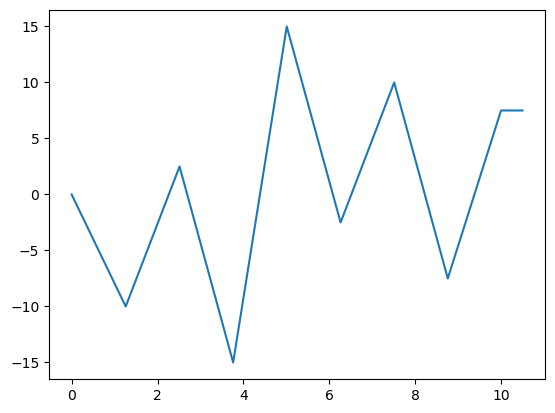

In [225]:
stimulus = gen_target(left,right,1)
plt.plot(stim_time, stimulus)

### Stimulus starting on right (not equal to 1)

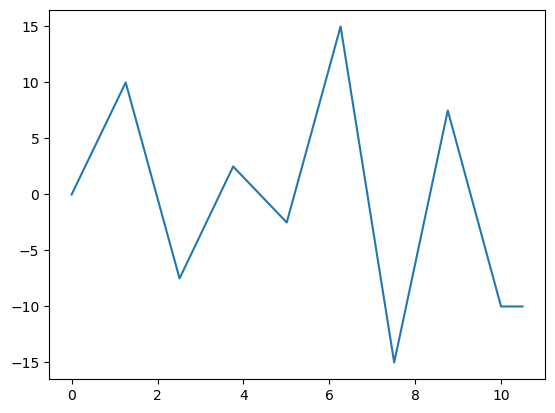

In [228]:
stimulus = gen_target(left,right,0)
plt.plot(stim_time, stimulus)

In [230]:
reconstructed_time=[0,1.259,1.260,2.513,2.514,3.761,3.762,5.009,5.010,6.263,6.264,7.511,7.512,8.759, 8.760, 9.999,10.000,10.5]
def gen_reconstructed_laser(stimulus):
  stim = stimulus[:-1]
  reconstructed_laser = [val for val in stim for _ in (0, 1)]
  return reconstructed_laser

In [232]:
reconst_laser = gen_reconstructed_laser(stimulus)
reconstruction = pd.DataFrame([reconstructed_time,reconst_laser]).T
reconstruction.columns = ["Time","Amplitude"]
reconstruction.head()

,Time,Amplitude
0,0.000,0.0
1,1.259,0.0
2,1.260,10.0
3,2.513,10.0
4,2.514,-7.5


### Target Sequence

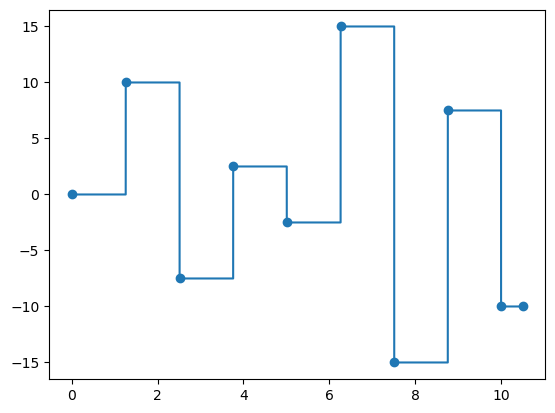

In [235]:
plt.plot(reconstructed_time,gen_reconstructed_laser(stimulus))
plt.scatter(stim_time, stimulus)

## Generating the saccades

### Functions to produce latency, velocity and amplitude

In [239]:
#using this set of values for velocity ranges for specific angles

##UPDATE: CANNOT USE A FIXED AMPLITUDE BECAUSE THE AMP VARIES WITH THE ACCURACY
# def gen_velocity(amplitude):
#   amplitude = np.abs(amplitude)
#   if amplitude ==5:
#     return (np.random.uniform(260,440))
#   elif amplitude == 10:
#     return (np.random.uniform(400,600))
#   elif amplitude == 15:
#     return (np.random.uniform(500,670))
#   elif amplitude == 17.5:
#     return (np.random.uniform(4500,630))
#   elif amplitude == 20:
#     return (np.random.uniform(570,760))
#   elif amplitude == 22.5:
#     return (np.random.uniform(610,770))
#   elif amplitude == 25:
#     return (np.random.uniform(650,810))
#   elif amplitude == 30:
#     return (np.random.uniform(700,850))

#generate the velocity for the ALL saccade
def gen_velocity(amplitude):
  # print("input amp", amplitude)
  amplitude = np.abs(amplitude)
  if amplitude <= 6:
  # vel = func_exp(amplitude, *popt_exp)
      vel = func_exp(amplitude,a_exp,b_exp,c_exp)
  else:
      vel = func_fixsqrt(amplitude,a_fs,b_fs,c_fs) + np.random.uniform(0,15)*(-1)**np.random.randint(2)
  # print(vel)
  return vel

#generate the latency for a saccade for each subject
def gen_latency(subject):
    # normal subject latency parameters
    if subject == "N":
      return np.random.uniform(0.1,0.200)
    # abnormal subject latency range
    else:
      return np.random.uniform(0.1,0.2) #for a first pass we are only modeling changes in accuracy

#generate the latency for the correcting saccade
def gen_latency_correcting(subject, prev_lat):
    if subject == "N":
      return np.random.uniform(0.050,0.15)
    else:
      return np.random.uniform(0.050,0.15) #for a first pass we are only modeling changes in accuracy

#generate accuracy for the saccade
def gen_accuracy(subject, condition, sac_seq):
# normal subject accuracy range
  if subject == "N":
    if sac_seq == "P":
      # return np.random.uniform(0.70,1.20)
      return 1
    else: #correcting saccade
      return 1
# abnormal subject accuracy range
  else: #abnormal saccade
    if condition == "hyper":
    # initial shift
      if sac_seq == "P":
        return np.random.uniform(1.1,1.5) #what's the upper limit?
      else: #corrective saccade
        return np.random.uniform(1.00,1.1)
    else: #hypometria
    # initial shift
      if sac_seq == "P":
        return np.random.uniform(0.20,0.70)
      else: #corrective saccade
        return np.random.uniform(0.90,1)

### Normal Waveform

In [242]:
def gen_waveform(stimulus, subject, condition, num):
  wave = [0, 0]
  time = [0, 1.259]
  main_seq = []
  for idx in range(len(stimulus)-1):  # Avoids out-of-range issues with stimulus[idx+1]
      # First time point: Start of the saccade (stim start + latency)
      lat = gen_latency(subject)
      time.append(time[-1] + lat)  # Appends new latency time
      wave.append(wave[-1])   # Appends current stimulus level

      # print("Step 1:", time[-4:], wave[-4:])

      # Second point: First saccade amplitude
      # amplitude change
      amp = gen_accuracy(subject, condition, "P") * stimulus[idx + 1] - wave[-1]
      wave.append(amp + wave[-1])  # Amplitude added to last wave point
      # generate velocity
      vel = gen_velocity(amp)
      time.append(time[-1] + np.abs(amp / vel))  # Time for saccade based on velocity
      main_seq.append([vel,amp])
      # print("Step 2:", amp, vel, time[-4:], wave[-4:])

      # Hold the saccade
      lat2 = gen_latency_correcting(subject, lat)
      time.append(time[-1] + lat2)  # Time after latency correction
      wave.append(wave[-1])  # Holds at current amplitude
      # print("Step 3:", lat2, time[-4:], wave[-4:])

      # Third point: Corrective saccade
      amp_c = gen_accuracy(subject, condition, "C") * stimulus[idx + 1] - amp
      vel_c = gen_velocity(amp_c)
      time.append(time[-1] + np.abs(amp_c / vel_c))  # Time for corrective saccade
      wave.append(amp_c + amp)  # New amplitude after corrective saccade
      main_seq.append([vel_c,amp_c])
      # print("Step 4:", amp_c, amp, vel_c, time[-1], time[-4:], wave[-4:])

      # Hold the corrective saccade
      if idx >= len(stimulus) - 3:  # Ensure we don’t exceed `stimulus` length
          break
      final_amp = wave[-1]  # Hold at current amplitude for final correction
      time.append(stim_time[idx + 2])  # Appends the next stimulation time
      wave.append(final_amp)  # Append final amplitude
  time.append(10.5)
  wave.append(wave[-1])
      # print("Step 5:", final_amp, stim_time[idx + 2], time[-4:], wave[-4:])
  return time, wave, main_seq

Text(0.5, 1.0, 'Normal Saccade')

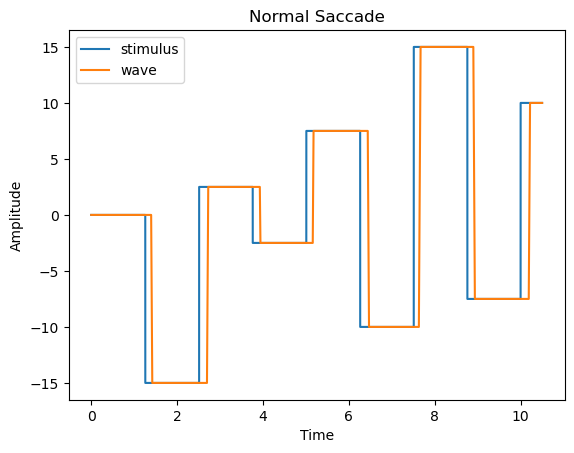

In [244]:
stimulus = gen_target(left,right,1)
time, wave, main_seq = gen_waveform(stimulus,"N","none",0)
plt.plot(reconstructed_time,gen_reconstructed_laser(stimulus))
plt.plot(time, wave)
plt.legend(["stimulus","wave"])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Normal Saccade")

In [246]:
reconst_laser = gen_reconstructed_laser(stimulus)
reconstruction = pd.DataFrame([reconstructed_time,reconst_laser]).T
reconstruction.columns = ["Time","Amplitude"]
reconstruction.head()

,Time,Amplitude
0,0.000,0.0
1,1.259,0.0
2,1.260,-15.0
3,2.513,-15.0
4,2.514,2.5


In [248]:
patient = pd.DataFrame([time,wave]).T
patient.columns = ["Time","Amplitude"]
patient.head()

,Time,Amplitude
0,0.000000,0.0
1,1.259000,0.0
2,1.396081,0.0
3,1.422405,-15.0
4,1.483476,-15.0


In [250]:
combined_data = pd.merge(reconstruction,patient,how = 'outer',on = 'Time')
combined_data.columns = ['Time','Stimulus','Patient']
combined_data.interpolate(method='linear').head()

,Time,Stimulus,Patient
0,0.000000,0.0,0.0
1,1.259000,0.0,0.0
2,1.260000,-15.0,0.0
3,1.396081,-15.0,0.0
4,1.422405,-15.0,-15.0


### Abnormal Saccade

In [253]:
#trial code
wave = [0, 0]
time = [0, 1.259]

for idx in range(len(stimulus)-1):  # Avoids out-of-range issues with stimulus[idx+1]
    # First time point: Start of the saccade (stim start + latency)
    lat = gen_latency("A")
    time.append(time[-1] + lat)  # Appends new latency time
    wave.append(wave[-1])   # Appends current stimulus level
    # print("Step 1:", time[-4:], wave[-4:])

    # Second point: First saccade amplitude
    amp = gen_accuracy("A", "hyper", "P") * stimulus[idx + 1] - wave[-1]
    wave.append(amp + wave[-1])  # Amplitude added to last wave point
    vel = gen_velocity(amp)
    time.append(time[-1] + np.abs(amp / vel))  # Time for saccade based on velocity
    # print("Step 2:", amp, vel, time[-4:], wave[-4:])

    # Hold the saccade
    lat2 = gen_latency_correcting("N", lat)
    time.append(time[-1] + lat2)  # Time after latency correction
    wave.append(wave[-1])  # Holds at current amplitude
    # print("Step 3:", lat2, time[-4:], wave[-4:])

    # Third point: Corrective saccade
    amp_c = gen_accuracy("A", "hyper", "C") * stimulus[idx + 1] - amp
    vel_c = gen_velocity(amp_c)
    time.append(time[-1] + np.abs(amp_c / vel_c))  # Time for corrective saccade
    wave.append(amp_c + amp)  # New amplitude after corrective saccade
    # print("Step 4:", amp_c, amp, vel_c, time[-1], time[-4:], wave[-4:])

    # Hold the corrective saccade
    if idx >= len(stimulus) - 2:  # Ensure we don’t exceed `stimulus` length
      break
    final_amp = wave[-1]  # Hold at current amplitude for final correction
    time.append(stim_time[idx + 2])  # Appends the next stimulation time
    wave.append(final_amp)  # Append final amplitude
    # print("Step 5:", final_amp, stim_time[idx + 2], time[-4:], wave[-4:])


Checking if the 'gen_waveform' function works well for abnormal saccades

Text(0.5, 1.0, 'Biateral Hypometric Saccades')

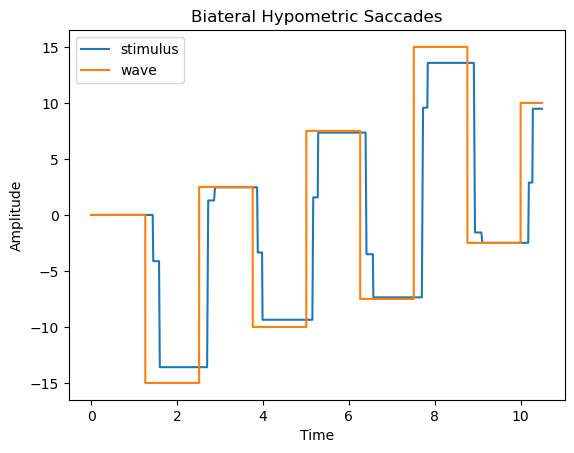

In [256]:
#hypometria
stimulus = gen_target(left,right,1)
time, wave, main_seq = gen_waveform(stimulus,"A","hypo",3)
plt.plot(time, wave)
plt.plot(reconstructed_time,gen_reconstructed_laser(stimulus))
plt.legend(["stimulus","wave"])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Biateral Hypometric Saccades")

Text(0.5, 1.0, 'Biateral Hypermetric Saccades')

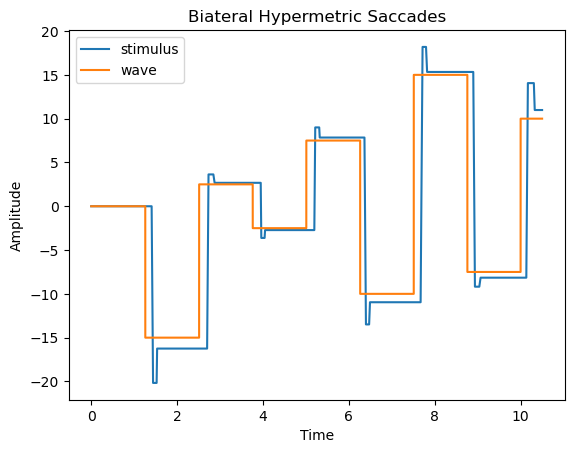

In [258]:
#hypermetria
stimulus = gen_target(left,right,1)
time, wave, main_seq = gen_waveform(stimulus,"A","hyper",1)
plt.plot(time, wave)
plt.plot(reconstructed_time,gen_reconstructed_laser(stimulus))
plt.legend(["stimulus","wave"])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Biateral Hypermetric Saccades")

## Waveforms for unilateral contra and ipsi

could add the if condition to the above gen waveform function but -

In [262]:
def gen_unilateral(stimulus, subject, condition, num):
  wave = [0, 0]
  time = [0, 1.259]
  main_seq = []
  for idx in range(len(stimulus)-1):  # Avoids out-of-range issues with stimulus[idx+1]
    if num == 1: #generating hypers first and then hypos
        if idx % 2 ==0:
          # First time point: Start of the saccade (stim start + latency)
          lat = gen_latency(subject)
          time.append(time[-1] + lat)  # Appends new latency time
          wave.append(wave[-1])
          # print("Step 1:", time[-4:], wave[-4:])

          # Second point: First saccade amplitude
          amp = gen_accuracy(subject, "hyper", "P") * stimulus[idx + 1] - wave[-1]
          wave.append(amp + wave[-1])  # Amplitude added to last wave point
          vel = gen_velocity(amp)
          time.append(time[-1] + np.abs(amp / vel))  # Time for saccade based on velocity
          main_seq.append([vel,amp])
          # print("Step 2:", amp, vel, time[-4:], wave[-4:])

          # Hold the saccade
          lat2 = gen_latency_correcting(subject, lat)
          time.append(time[-1] + lat2)  # Time after latency correction
          wave.append(wave[-1])  # Holds at current amplitude
          # print("Step 3:", lat2, time[-4:], wave[-4:])

          # Third point: Corrective saccade
          amp_c = gen_accuracy(subject, "hyper", "C") * stimulus[idx + 1] - amp
          vel_c = gen_velocity(amp_c)
          time.append(time[-1] + np.abs(amp_c / vel_c))  # Time for corrective saccade
          wave.append(amp_c + amp)  # New amplitude after corrective saccade
          main_seq.append([vel_c,amp_c])
          # print("Step 4:", amp_c, amp, vel_c, time[-1], time[-4:], wave[-4:])

          # Hold the corrective saccade
          if idx >= len(stimulus) - 3:  # Ensure we don’t exceed `stimulus` length
              break
          final_amp = wave[-1]  # Hold at current amplitude for final correction
          time.append(stim_time[idx + 2])  # Appends the next stimulation time
          wave.append(final_amp)  # Append final amplitude

        else: #generating hypos first and then hypers
          lat = gen_latency(subject)
          time.append(time[-1] + lat)  # Appends new latency time
          wave.append(wave[-1])   # Appends current stimulus level

          # Second point: First saccade amplitude
          amp = gen_accuracy(subject, "hypo", "P") * stimulus[idx + 1] - wave[-1]
          wave.append(amp + wave[-1])  # Amplitude added to last wave point
          vel = gen_velocity(amp)
          time.append(time[-1] + np.abs(amp / vel))  # Time for saccade based on velocity
          main_seq.append([vel,amp])

          # Hold the saccade
          lat2 = gen_latency_correcting(subject, lat)
          time.append(time[-1] + lat2)  # Time after latency correction
          wave.append(wave[-1])  # Holds at current amplitude

          # Third point: Corrective saccade
          amp_c = gen_accuracy(subject, "hypo", "C") * stimulus[idx + 1] - amp
          vel_c = gen_velocity(amp_c)
          time.append(time[-1] + np.abs(amp_c / vel_c))  # Time for corrective saccade
          wave.append(amp_c + amp)  # New amplitude after corrective saccade
          main_seq.append([vel_c,amp_c])

          # Hold the corrective saccade
          if idx >= len(stimulus) - 3:  # Ensure we don’t exceed `stimulus` length
              break
          final_amp = wave[-1]  # Hold at current amplitude for final correction
          time.append(stim_time[idx + 2])  # Appends the next stimulation time
          wave.append(final_amp)  # Append final amplitude

    else:
        if idx % 2 ==1:
          # First time point: Start of the saccade (stim start + latency)
          lat = gen_latency(subject)
          time.append(time[-1] + lat)  # Appends new latency time
          wave.append(wave[-1])
          # print("Step 1:", time[-4:], wave[-4:])

          # Second point: First saccade amplitude
          amp = gen_accuracy(subject, "hyper", "P") * stimulus[idx + 1] - wave[-1]
          wave.append(amp + wave[-1])  # Amplitude added to last wave point
          vel = gen_velocity(amp)
          time.append(time[-1] + np.abs(amp / vel))  # Time for saccade based on velocity
          main_seq.append([vel,amp])
          # print("Step 2:", amp, vel, time[-4:], wave[-4:])

          # Hold the saccade
          lat2 = gen_latency_correcting(subject, lat)
          time.append(time[-1] + lat2)  # Time after latency correction
          wave.append(wave[-1])  # Holds at current amplitude
          # print("Step 3:", lat2, time[-4:], wave[-4:])

          # Third point: Corrective saccade
          amp_c = gen_accuracy(subject, "hyper", "C") * stimulus[idx + 1] - amp
          vel_c = gen_velocity(amp_c)
          time.append(time[-1] + np.abs(amp_c / vel_c))  # Time for corrective saccade
          wave.append(amp_c + amp)  # New amplitude after corrective saccade
          main_seq.append([vel_c,amp_c])
          # print("Step 4:", amp_c, amp, vel_c, time[-1], time[-4:], wave[-4:])

          # Hold the corrective saccade
          if idx >= len(stimulus) - 3:  # Ensure we don’t exceed `stimulus` length
              break
          final_amp = wave[-1]  # Hold at current amplitude for final correction
          time.append(stim_time[idx + 2])  # Appends the next stimulation time
          wave.append(final_amp)  # Append final amplitude

        else:
          lat = gen_latency(subject)
          time.append(time[-1] + lat)  # Appends new latency time
          wave.append(wave[-1])   # Appends current stimulus level

          # Second point: First saccade amplitude
          amp = gen_accuracy(subject, "hypo", "P") * stimulus[idx + 1] - wave[-1]
          wave.append(amp + wave[-1])  # Amplitude added to last wave point
          vel = gen_velocity(amp)
          time2 = time[-1] + np.abs(amp / vel)
          time.append(time[-1] + np.abs(amp / vel))  # Time for saccade based on velocity
          main_seq.append([vel,amp])

          # Hold the saccade
          lat2 = gen_latency_correcting(subject, lat)
          time.append(time[-1] + lat2)  # Time after latency correction
          wave.append(wave[-1])  # Holds at current amplitude

          # Third point: Corrective saccade
          amp_c = gen_accuracy(subject, "hypo", "C") * stimulus[idx + 1] - amp
          vel_c = gen_velocity(amp_c)
          time.append(time[-1] + np.abs(amp_c / vel_c))  # Time for corrective saccade
          wave.append(amp_c + amp)  # New amplitude after corrective saccade
          main_seq.append([vel_c,amp_c])

          # Hold the corrective saccade
          if idx >= len(stimulus) - 3:  # Ensure we don’t exceed `stimulus` length
              break
          final_amp = wave[-1]  # Hold at current amplitude for final correction
          time.append(stim_time[idx + 2])  # Appends the next stimulation time
          wave.append(final_amp)  # Append final amplitude



  time.append(10.5)
  wave.append(wave[-1])
  return time, wave, main_seq

Text(0.5, 1.0, 'Unilateral Lesion')

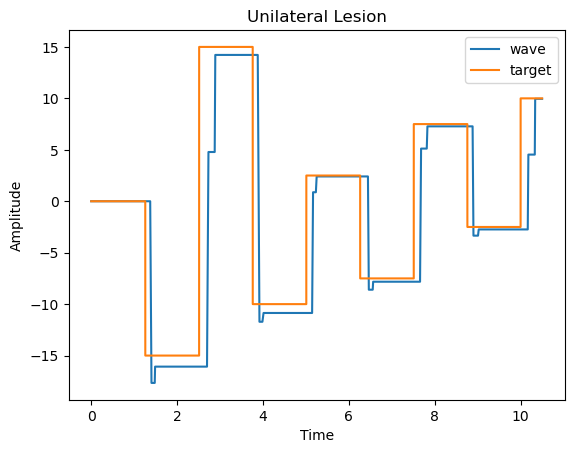

In [264]:
# unilateral
stimulus = gen_target(left,right,1)
time, wave, main_seq = gen_unilateral(stimulus,"A","unilateral",1)
plt.plot(time, wave)
plt.plot(reconstructed_time,gen_reconstructed_laser(stimulus))
plt.legend(["wave","target"])
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.title("Unilateral Lesion")

In [266]:
stimulus = gen_target(left,right,1)
stimulus

[0, -2.5, 10, -7.5, 7.5, -10, 15, -15, 2.5, 2.5]

### Pandas dataframe

In [269]:
def make_df(time, waveform, i):
    timesteps = np.arange(0,10500,1)
    wave_1000 = pd.DataFrame(data=timesteps, columns=["timesteps"]).set_index("timesteps")
    wave_df = pd.DataFrame({"timesteps": (np.array(time) * 1000).astype(int), f"amplitude_{i}": waveform})
    wave_df.set_index("timesteps", inplace=True)
    wave_1000 = wave_1000.join(wave_df, rsuffix=f"_{i}").interpolate(method='linear', limit_direction='both')
    # left_key_counts = wave_1000.index.value_counts()
    # right_key_counts = wave_df.index.value_counts()
    # print("Left key distribution:\n", left_key_counts)
    # print("Right key distribution:\n", right_key_counts)
    # if len(wave_1000) > 10500:
        # print(time);
        # wave_1000 = wave_1000.iloc[:-1,:]
    wave_1000 = wave_1000.join(wave_df,on = "timesteps", rsuffix=f"_{i}")
    # duplicateRows = wave_1000[wave_1000.index.duplicated()]
    # print(duplicateRows)
    return wave_1000

In [271]:
stimulus = gen_target(left,right,1)
time, wave, main_seq = gen_unilateral(stimulus,"A","unilateral",1)
unilateral_df = make_df(time,wave,0)
unilateral_df = unilateral_df.iloc[:,:-1]
unilateral_df.rename(columns = {'amplitude_0':'amplitude'},inplace = True)
unilateral_df

,amplitude
timesteps,
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
10495,6.945662
10496,6.945662
10497,6.945662


### Making 5 normal, 5 hyper, 5 hypo and adding them to a pandas df

In [274]:
timesteps = np.arange(0,10500,1)

In [276]:
stimulus = gen_target(left,right,1)
# target sequence
reconstructed_laser = gen_reconstructed_laser(stimulus)
stimulus_df = make_df(reconstructed_time,reconstructed_laser,0)
stimulus_1000 = pd.DataFrame(index=timesteps)
stimulus_1000 = stimulus_1000.reset_index()
stimulus_1000.rename(columns = {'index':'timesteps'},inplace = True)
stimulus_1000 = stimulus_1000.join(stimulus_df,on = "timesteps").interpolate(method='linear', limit_direction='both')
stimulus_1000.rename(columns = {'amplitude_0':'amplitude'},inplace = True)
stimulus_1000.shape

(10500, 3)

In [278]:
stimulus_1000

,timesteps,amplitude,amplitude_0_0
0,0,0.0,0.0
1,1,0.0,0.0
2,2,0.0,0.0
3,3,0.0,0.0
4,4,0.0,0.0
...,...,...,...
10495,10495,7.5,7.5
10496,10496,7.5,7.5
10497,10497,7.5,7.5
10498,10498,7.5,7.5


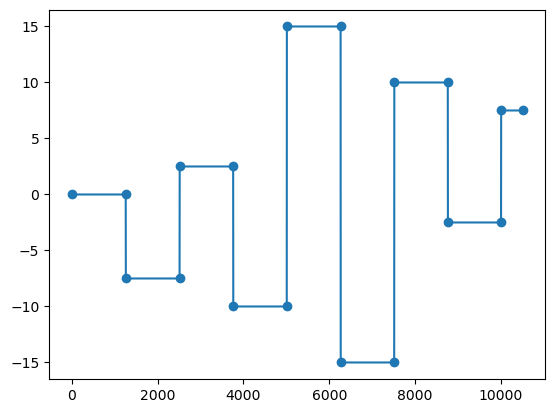

In [280]:
#checking if the 1000Hz stimulus looks good

plt.plot(stimulus_1000.index,stimulus_1000.amplitude)
t = [x*1000 for x in reconstructed_time]
plt.scatter(t,reconstructed_laser)

### 200 Normals, 200 Bilateral Hypos, 200 Bilateral Hypers, 200 Unilateral Lesion (Hypo on Right), 200 Unilateral Lesion (Hypo on Left)

In [409]:
# Create a tuple of tuples

# normal class
x_input_normal_1 = tuple(("N", "none",1) for _ in range(100))
x_input_normal_2 = tuple(("N", "none",2) for _ in range(100))

# bilateral hypometric class
x_input_hypo_1 = tuple(("A", "hypo",1) for _ in range(100))
x_input_hypo_2 = tuple(("A", "hypo",2) for _ in range(100))

# bilateral hypermetric class
x_input_hyper_1 = tuple(("A", "hyper",1) for _ in range(100))
x_input_hyper_2 = tuple(("A", "hyper",2) for _ in range(100))

x_input_list_one = np.concatenate((x_input_normal_1,x_input_normal_2,x_input_hypo_1,x_input_hypo_2,x_input_hyper_1,x_input_hyper_2))

In [411]:
# hypos on right & hypers on left
x_input_uni_1_1 = tuple(("A", "unilateral",1,1) for _ in range(100))
x_input_uni_2_2 = tuple(("A", "unilateral",2,2) for _ in range(100))

# hypers on right & hypos on left
x_input_uni_1_2 = tuple(("A", "unilateral",1,2) for _ in range(100))
x_input_uni_2_1 = tuple(("A", "unilateral",2,1) for _ in range(100))

In [413]:
#0 -> normal, 1-> bilateral hypo, 2 -> bilateral hyper, 3 -> hypo right & hyper left, 4 -> hyper right & hypo left
y_list = np.concatenate(([0]*200, [1]*200, [2]*200,[3]*200, [4]*200))

In [415]:
wave_merged = pd.DataFrame(data=timesteps, columns=["timesteps"]).set_index("timesteps")
merged_wave = []
stim_df = pd.DataFrame(data=stim_time, columns=["timesteps"])
tensor_combined = torch.empty(0)
stim_combined = torch.empty(0)
mainseq_combined = torch.empty(0)
data = []

for i, row in enumerate(x_input_list_one):
    # generate stimulus
    stimulus = gen_target(left,right,row[-2])
    time, waveform, main_seq = gen_waveform(stimulus, *row)
    wave_df = make_df(time, waveform,i)
    wave_df = wave_df.iloc[:10500,:]
    if(len(wave_df.T.values[0]) != 10500):
        print("What the hell")
        print(i)
        print(len(wave_df.T.values[0]))
    data.append(wave_df.T.values[:-1])
    if i % 1000 == 0:
        print("we're going strong..")

for i, row in enumerate(x_input_uni_1_1):
    # generate stimulus
    stimulus = gen_target(left,right,row[-2])
    saccade_pattern = row[-1]
    time, waveform, main_seq = gen_unilateral(stimulus, *row[:-2], saccade_pattern)
    wave_df = make_df(time, waveform,i)
    wave_df = wave_df.iloc[:10500,:-1]
    if(len(wave_df.T.values[0]) != 10500):
        print("What the hell")
        print(i)
        print(len(wave_df.T.values[0]))
    data.append(wave_df.T.values)
    # generate waveform
    if i % 1000 == 0:
        print("we're going strong..")

for i, row in enumerate(x_input_uni_2_2):
    # generate stimulus
    stimulus = gen_target(left,right,row[-2])
    saccade_pattern = row[-1]
    time, waveform, main_seq = gen_unilateral(stimulus, *row[:-2], saccade_pattern)
    wave_df = make_df(time, waveform,i)
    wave_df = wave_df.iloc[:10500,:-1]
    if(len(wave_df.T.values[0]) != 10500):
        print("What the hell")
        print(i)
        print(len(wave_df.T.values[0]))
    data.append(wave_df.T.values)
    # generate waveform
    if i % 1000 == 0:
        print("we're going strong..")

for i, row in enumerate(x_input_uni_1_2):
    # generate stimulus
    stimulus = gen_target(left,right,row[-2])
    saccade_pattern = row[-1]
    time, waveform, main_seq = gen_unilateral(stimulus, *row[:-2], saccade_pattern)
    wave_df = make_df(time, waveform,i)
    wave_df = wave_df.iloc[:10500,:-1]
    if(len(wave_df.T.values[0]) != 10500):
        print("What the hell")
        print(i)
        print(len(wave_df.T.values[0]))
    data.append(wave_df.T.values)
    # generate waveform
    if i % 1000 == 0:
        print("we're going strong..")

for i, row in enumerate(x_input_uni_2_1):
    # generate stimulus
    stimulus = gen_target(left,right,row[-2])
    saccade_pattern = row[-1]
    time, waveform, main_seq = gen_unilateral(stimulus, *row[:-2], saccade_pattern)
    wave_df = make_df(time, waveform,i)
    wave_df = wave_df.iloc[:10500,:-1]
    if(len(wave_df.T.values[0]) != 10500):
        print("What the hell")
        print(i)
        print(len(wave_df.T.values[0]))
    data.append(wave_df.T.values)
    # generate waveform
    if i % 1000 == 0:
        print("we're going strong..")

we're going strong..
we're going strong..
we're going strong..
we're going strong..
we're going strong..


In [416]:
transformed = np.array(data)
num_waves = np.shape(np.array(data))[0]
new = transformed.reshape(num_waves,10500)
wave_1000 = pd.DataFrame(new).T
wave_1000

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,-2.5,-15.0,-2.5,-7.5,-7.5,-2.5,-15.0,-2.5,-10.0,-2.5,...,-14.887368,-9.297177,-7.483863,-9.008167,-7.467383,-9.275904,-9.102364,-13.794138,-2.425026,-2.47091
10496,-2.5,-15.0,-2.5,-7.5,-7.5,-2.5,-15.0,-2.5,-10.0,-2.5,...,-14.887368,-9.297177,-7.483863,-9.008167,-7.467383,-9.275904,-9.102364,-13.794138,-2.425026,-2.47091
10497,-2.5,-15.0,-2.5,-7.5,-7.5,-2.5,-15.0,-2.5,-10.0,-2.5,...,-14.887368,-9.297177,-7.483863,-9.008167,-7.467383,-9.275904,-9.102364,-13.794138,-2.425026,-2.47091
10498,-2.5,-15.0,-2.5,-7.5,-7.5,-2.5,-15.0,-2.5,-10.0,-2.5,...,-14.887368,-9.297177,-7.483863,-9.008167,-7.467383,-9.275904,-9.102364,-13.794138,-2.425026,-2.47091


In [429]:
wave_500 = wave_1000[wave_1000.index % 2 != 0]  # Excludes every 2nd row starting from 0
wave_250 = wave_500[::3]  # Excludes every 2nd row starting from 0
wave_125 = wave_250[::2]  # Excludes every 2nd row starting from 0

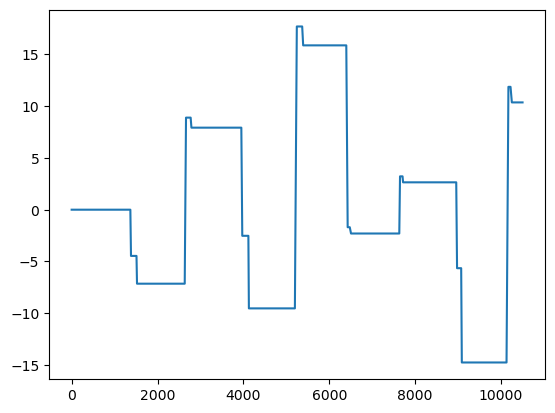

In [431]:
plt.plot(wave_1000.index,wave_1000.iloc[:,801])

### Comparing the 1000 Hz waveform to downsampled version

In [487]:
plt.plot(timesteps, wave_1000[:,1])
plt.plot(wave_500.index, wave_500[:,1], c = "orange",alpha = 0.7)
plt.xlabel("Time")
plt.ylabel("Amplitude")
# plt.legend(["1000Hz","500Hz","250Hz","125Hz"])
plt.legend(["1000Hz","500Hz"])
plt.xlim(1350,1600)

KeyError: (slice(None, None, None), 1)

In [321]:
plt.plot(timesteps, wave_1000.amplitude_3)
plt.plot(wave_250.index, wave_250.amplitude_3, c = "orange",alpha = 0.7)
plt.xlabel("Time")
plt.ylabel("Amplitude")
# plt.legend(["1000Hz","500Hz","250Hz","125Hz"])
plt.legend(["1000Hz","250Hz"])
plt.xlim(1350,1600)

AttributeError: 'DataFrame' object has no attribute 'amplitude_3'

(1350.0, 1600.0)

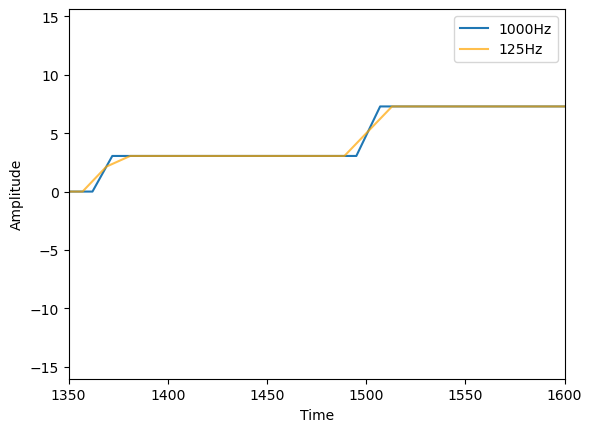

In [220]:
plt.plot(timesteps, wave_1000.amplitude_3)
plt.plot(wave_125.index, wave_125.amplitude_3, c = "orange",alpha = 0.7)
plt.xlabel("Time")
plt.ylabel("Amplitude")
# plt.legend(["1000Hz","500Hz","250Hz","125Hz"])
plt.legend(["1000Hz","125Hz"])
plt.xlim(1350,1600)

In [222]:
# wave_merged.to_csv("output.csv", index=False)

### Train test split

In [233]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    wave_interpolate, y_list, test_size=0.3, random_state=42)

NameError: name 'wave_interpolate' is not defined

In [235]:
print(f"wave_interpolate shape: {wave_interpolate.shape}")
print(f"y_list shape: {y_list.shape}")


NameError: name 'wave_interpolate' is not defined

## Checking if the velocity amplitue duration follow the main sequence


In [238]:
main_seq_data = pd.read_csv(r"/content/main_seq.csv")
# main_seq_data.drop(main_seq_data,inplace=True)
main_seq_data
# main_seq_data.columns = ["vel","amp","dur"]
# main_seq_data.amplitude = main_seq_data.amplitude.applymap(lambda x: np.abs(x))
# df = df.applymap(lambda x: x + 1)

FileNotFoundError: [Errno 2] No such file or directory: '/content/main_seq.csv'

In [240]:
plt.scatter(main_seq_data.amp,main_seq_data.dur)
plt.xlabel("Amplitude")
plt.ylabel("Duration")

NameError: name 'main_seq_data' is not defined

In [242]:
from sklearn import datasets, linear_model
x =  main_seq_data.amp.values.reshape(36000,1)
y =main_seq_data.dur.values.reshape(36000,1)
regr = linear_model.LinearRegression()
regr.fit(x, y)

# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

NameError: name 'main_seq_data' is not defined

In [ ]:
regr.coef_*1000

In [245]:
regr.intercept_*1000

NameError: name 'regr' is not defined

## Showing oth fitted curve and data for the velocity generation

In [249]:
xy_1 = pd.read_csv("/content/xy_data_amp_less_than_6.txt", sep="\t", header = None, names=["amp","vel"])
xy_2 = pd.read_csv("/content/xy_data_curve_fitting.txt", sep="\t", header = None, names=["amp","vel"])


FileNotFoundError: [Errno 2] No such file or directory: '/content/xy_data_amp_less_than_6.txt'

In [ ]:
popt_fs, pcov_fs = curve_fit(func_fixsqrt, xy_2.amp, xy_2.vel)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

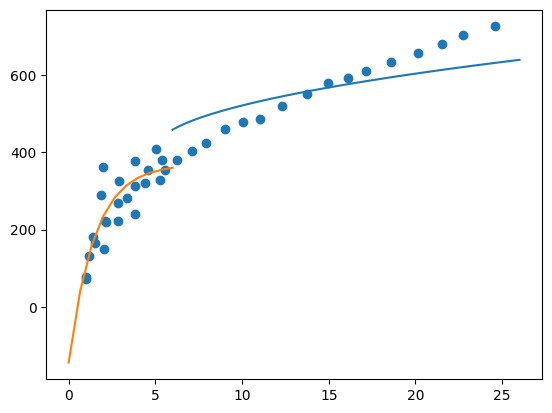

In [ ]:
xy = pd.concat([xy_1,xy_2])
plt.scatter(xy.amp,xy.vel)
ran_x = np.linspace(6,26,50)
y = func_fixsqrt(ran_x, *popt_fs)
ran_x2 = np.linspace(0,6,10)
y2 = func_exp(ran_x2,*popt_exp)
plt.plot(ran_x,y)
plt.plot(ran_x2,y2)

## ttt

In [93]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [94]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


### 1000 Hz Model Run

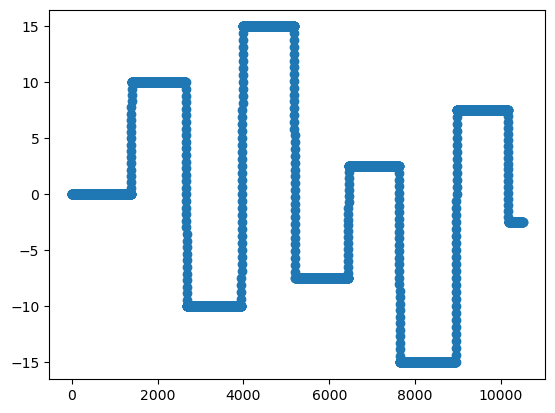

In [433]:
# Normal Saccade
plt.scatter(wave_1000.index,wave_1000.iloc[:,0])

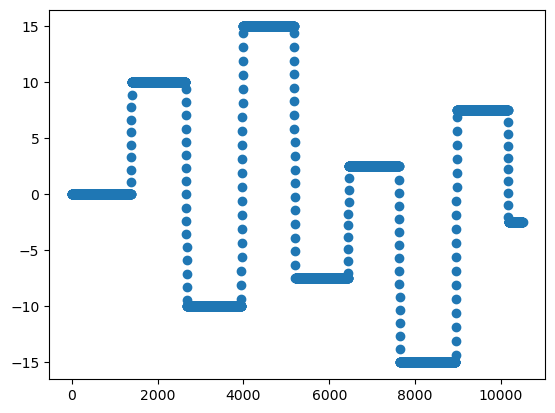

In [435]:
plt.scatter(wave_500.index,wave_500.iloc[:,0])

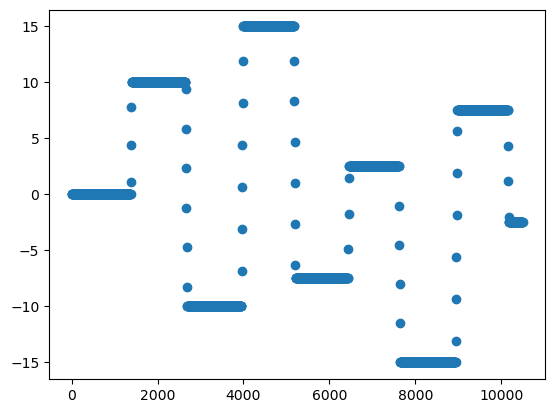

In [437]:
plt.scatter(wave_250.index,wave_250.iloc[:,0])

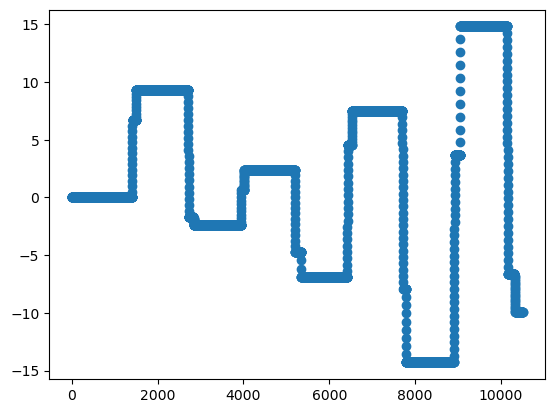

In [439]:
# Bilateral Hypometric
plt.scatter(wave_1000.index,wave_1000.iloc[:,201])

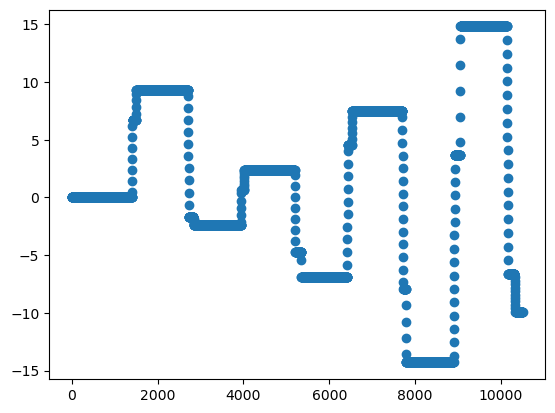

In [441]:
plt.scatter(wave_500.index,wave_500.iloc[:,201])

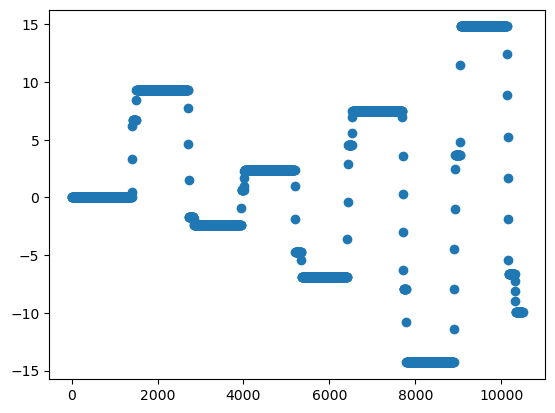

In [443]:
plt.scatter(wave_250.index,wave_250.iloc[:,201])

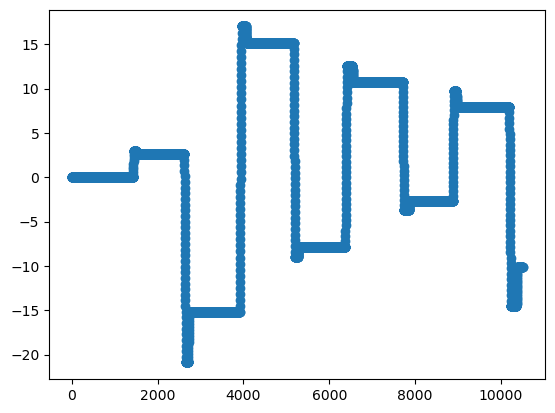

In [451]:
# Bilateral Hypermetric
plt.scatter(wave_1000.index,wave_1000.iloc[:,401])

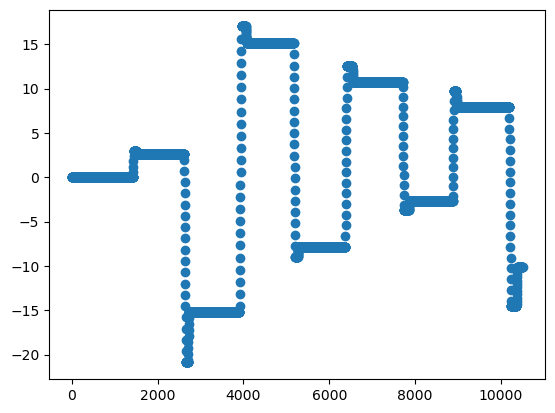

In [449]:
plt.scatter(wave_500.index,wave_500.iloc[:,401])

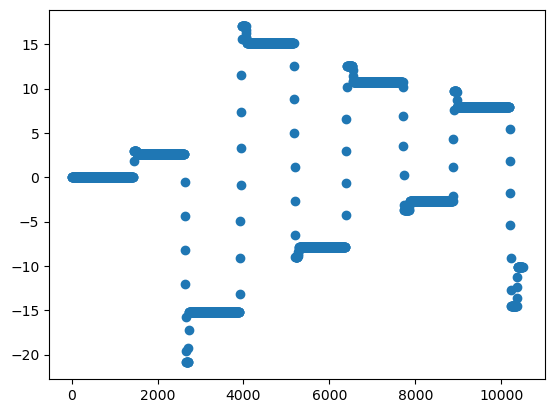

In [453]:
plt.scatter(wave_250.index,wave_250.iloc[:,401])

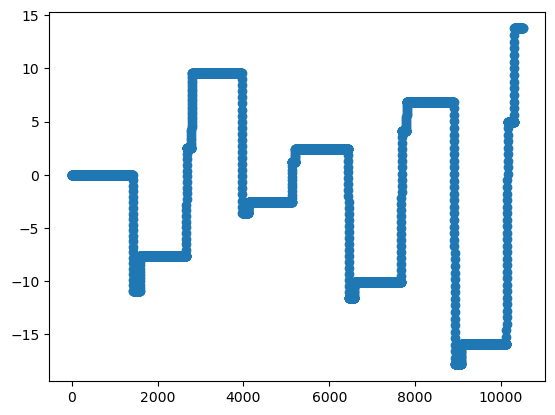

In [455]:
# Hyper left & hypo right
plt.scatter(wave_1000.index,wave_1000.iloc[:,601])

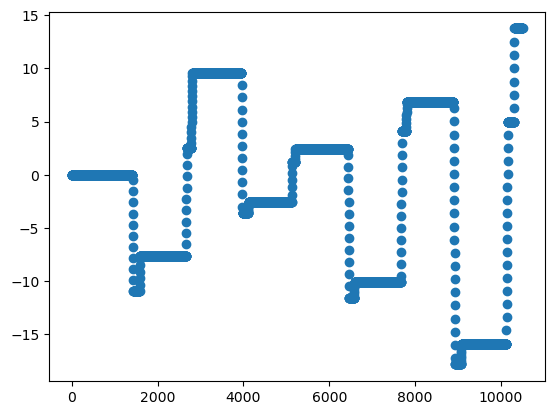

In [457]:
plt.scatter(wave_500.index,wave_500.iloc[:,601])

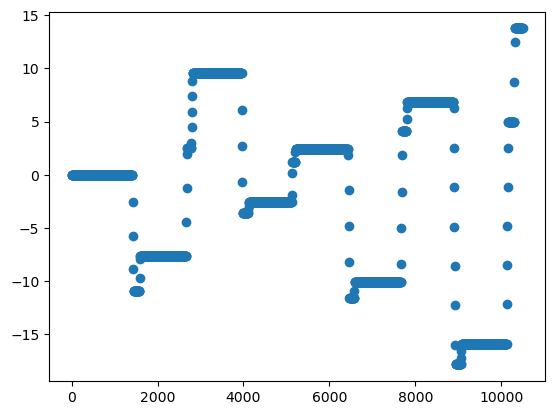

In [459]:
plt.scatter(wave_250.index,wave_250.iloc[:,601])

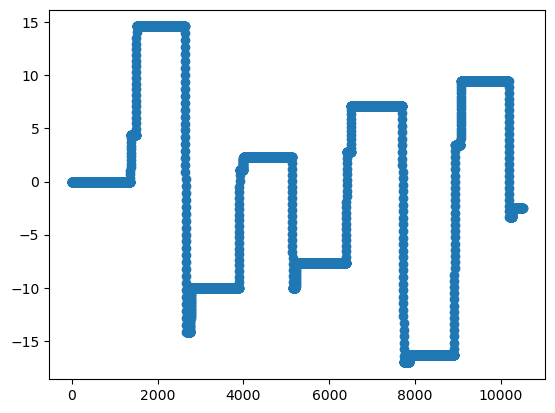

In [461]:
# Hyper left & hypo right
plt.scatter(wave_1000.index,wave_1000.iloc[:,701])

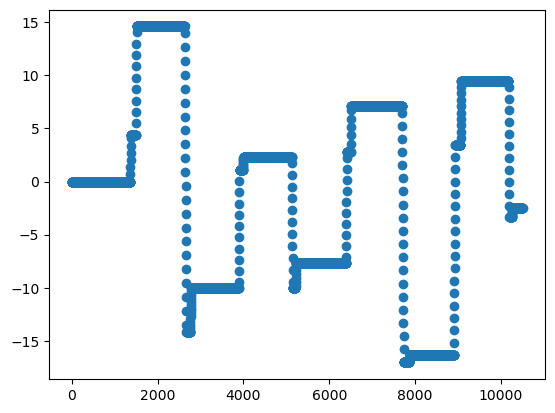

In [463]:
plt.scatter(wave_500.index,wave_500.iloc[:,701])

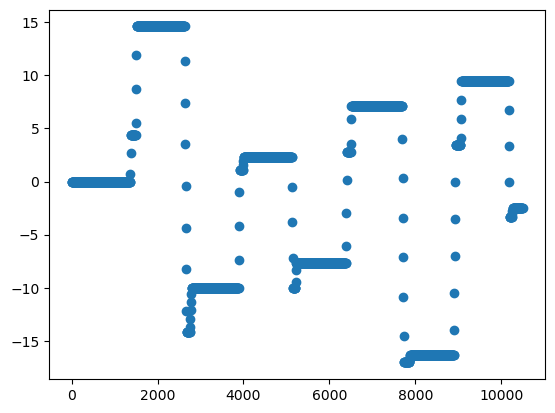

In [465]:
plt.scatter(wave_250.index,wave_250.iloc[:,701])

In [182]:
X = wave_1000.T.values
X = X.reshape((X.shape[0], X.shape[1], 1))
X.shape

(1000, 10500, 1)

In [102]:
# Labels: 0 - normal, 1 - hypometria, 2 - hypermetria
y = to_categorical(y_list)  # Convert to one-hot encoding
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [184]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (700, 10500, 1), y_train shape: (700, 5)
X_test shape: (300, 10500, 1), y_test shape: (300, 5)


In [104]:
np.sum(y_train,axis = 0)

array([140., 140., 140., 140., 140.])

In [105]:
np.sum(y_test, axis = 0)

array([60., 60., 60., 60., 60.])

In [106]:
# Define the 1D CNN Model

model = Sequential()

# Add 3 convolutional layers
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(10500,1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 3 classes
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - accuracy: 0.2690 - loss: 12.3778 - val_accuracy: 0.3929 - val_loss: 1.4390
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.3753 - loss: 1.3955 - val_accuracy: 0.4143 - val_loss: 1.3774
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 206ms/step - accuracy: 0.4394 - loss: 1.3251 - val_accuracy: 0.3429 - val_loss: 1.3778
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - accuracy: 0.4600 - loss: 1.2847 - val_accuracy: 0.5929 - val_loss: 1.0978
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.5878 - loss: 1.0233 - val_accuracy: 0.5714 - val_loss: 0.9744
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - accuracy: 0.5893 - loss: 1.0199 - val_accuracy: 0.5357 - val_loss: 0.8744
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 210ms/step - accuracy: 0.5935 - loss: 0.9240 - val_accuracy: 0.6571 - val_loss: 0.8682
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - accuracy: 0.6248 - loss: 0.8595 - val_accuracy: 0

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


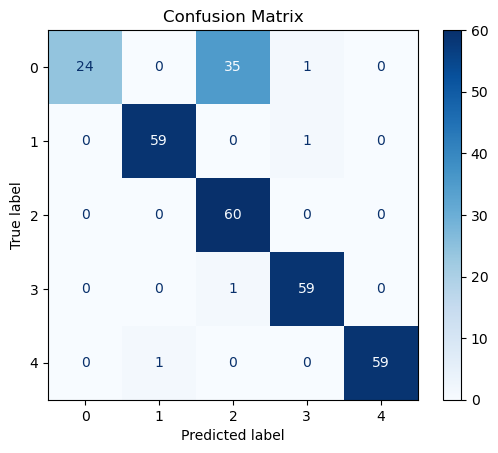

In [124]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if y_test.ndim == 1:
    y_true = y_test
else:
    y_true = np.argmax(y_test, axis=1)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### ALL DATA in the Normal Class

In [174]:
zero_indices = np.where(y_true == 0)
true_zero_indices = zero_indices[0]

In [186]:
true_pred = np.where(pred_values == 0)[0]
false_pred_ones = np.where(pred_values == 1)[0]
false_pred_twos = np.where(pred_values == 2)[0]
false_pred_threes = np.where(pred_values == 3)[0]
false_pred_fours = np.where(pred_values == 4)[0]

In [202]:
tpredind_one = true_zero_indices[true_pred]
fpredind_one = true_zero_indices[false_pred_ones]
fpredind_two = true_zero_indices[false_pred_twos]
fpredind_threes = true_zero_indices[false_pred_threes]
fpredind_fours = true_zero_indices[false_pred_fours]

In [204]:
true_0_0 = X_test[tpredind_one]
false_0_1 = X_test[fpredind_one]
false_0_2 = X_test[fpredind_two]
false_0_3 = X_test[fpredind_threes]
false_0_4 = X_test[fpredind_fours]

### 2 Layer Run

In [126]:
# Define the 1D CNN Model

model = Sequential()

# Add 3 convolutional layers
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(10500,1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))


# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 3 classes
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step - accuracy: 0.2547 - loss: 34.6565 - val_accuracy: 0.2857 - val_loss: 2.2095
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.3582 - loss: 2.0102 - val_accuracy: 0.2714 - val_loss: 1.4201
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.3405 - loss: 1.3961 - val_accuracy: 0.3000 - val_loss: 1.4236
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.3674 - loss: 1.3108 - val_accuracy: 0.3071 - val_loss: 1.3913
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.4119 - loss: 1.2909 - val_accuracy: 0.3143 - val_loss: 1.3596
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.4074 - loss: 1.2750 - val_accuracy: 0.3143 - val_loss: 1.3380
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.4187 - loss: 1.2811 - val_accuracy: 0.3143 - val_loss: 1.3312
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.3965 - loss: 1.2675 - val_accuracy: 0.3143 - val

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


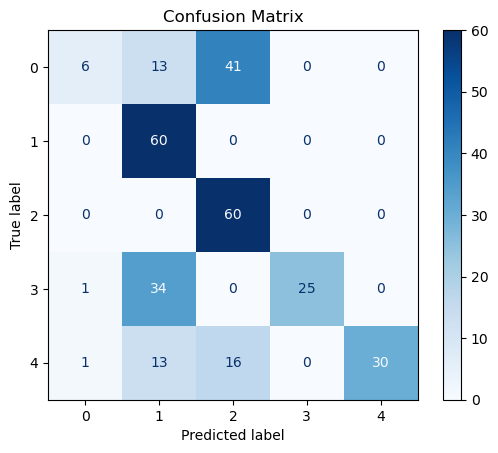

In [128]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if y_test.ndim == 1:
    y_true = y_test
else:
    y_true = np.argmax(y_test, axis=1)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### 1 Layer Run

In [186]:
# Define the 1D CNN Model

model = Sequential()

# Add 1 convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(10500,1)))
model.add(MaxPooling1D(pool_size=2))


# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 3 classes
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.2996 - loss: 107.5712 - val_accuracy: 0.2929 - val_loss: 5.5834
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.4095 - loss: 9.6993 - val_accuracy: 0.3071 - val_loss: 1.6207
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.3787 - loss: 3.7414 - val_accuracy: 0.3143 - val_loss: 1.3425
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.4047 - loss: 1.8810 - val_accuracy: 0.3143 - val_loss: 1.3407
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.4603 - loss: 1.6898 - val_accuracy: 0.3143 - val_loss: 1.3393
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.4125 - loss: 1.5588 - val_accuracy: 0.3143 - val_loss: 1.3375
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.4000 - loss: 1.3772 - val_accuracy: 0.3143 - val_loss: 1.3360
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.4365 - loss: 1.3419 - val_accuracy: 0.3143 - val_l

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


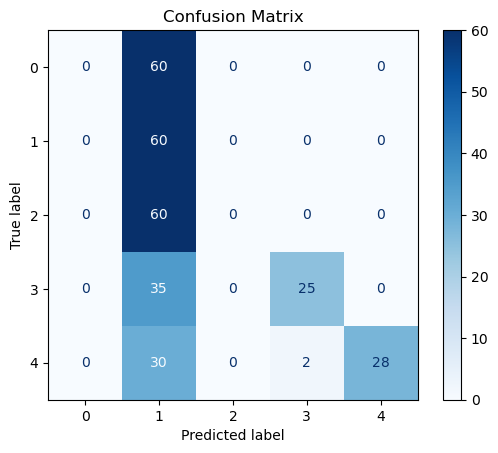

In [133]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if y_test.ndim == 1:
    y_true = y_test
else:
    y_true = np.argmax(y_test, axis=1)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### 500 Hz Model Run

### 3 Layers

In [284]:
X = wave_500.T.values
X = X.reshape((X.shape[0], X.shape[1], 1))
X.shape

(1000, 5250, 1)

In [286]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (700, 5250, 1), y_train shape: (700, 5)
X_test shape: (300, 5250, 1), y_test shape: (300, 5)


In [139]:
# Define the 1D CNN Model

model = Sequential()

# Add 3 convolutional layers
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(5250,1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 3 classes
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.3247 - loss: 7.7477 - val_accuracy: 0.2429 - val_loss: 1.4225
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.3194 - loss: 1.4097 - val_accuracy: 0.3214 - val_loss: 1.3570
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.4498 - loss: 1.2943 - val_accuracy: 0.5214 - val_loss: 1.2160
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.5320 - loss: 1.1474 - val_accuracy: 0.5500 - val_loss: 1.0464
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.5774 - loss: 0.9843 - val_accuracy: 0.7214 - val_loss: 0.9135
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.5948 - loss: 0.9289 - val_accuracy: 0.7143 - val_loss: 0.7918
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.6607 - loss: 0.7821 - val_accuracy: 0.8000 - val_loss: 0.6532
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.7112 - loss: 0.6562 - val_accuracy: 0.7857 - val_los

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


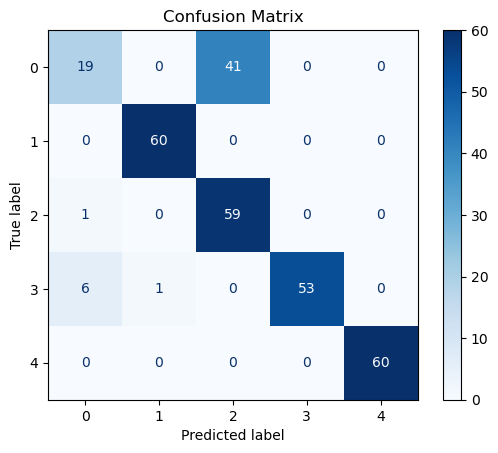

In [140]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if y_test.ndim == 1:
    y_true = y_test
else:
    y_true = np.argmax(y_test, axis=1)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### 2 Layers

In [142]:
# Define the 1D CNN Model

model = Sequential()

# Add 3 convolutional layers
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(5250,1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 3 classes
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.2775 - loss: 25.7451 - val_accuracy: 0.3000 - val_loss: 1.8541
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.3764 - loss: 1.5913 - val_accuracy: 0.3143 - val_loss: 1.3910
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.3883 - loss: 1.3192 - val_accuracy: 0.2714 - val_loss: 1.3942
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.4069 - loss: 1.2955 - val_accuracy: 0.3643 - val_loss: 1.3435
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.4641 - loss: 1.2874 - val_accuracy: 0.3429 - val_loss: 1.3238
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.4831 - loss: 1.2541 - val_accuracy: 0.3786 - val_loss: 1.3079
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.5076 - loss: 1.1698 - val_accuracy: 0.3786 - val_loss: 1.3060
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.4999 - loss: 1.1643 - val_accuracy: 0.4357 - 

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


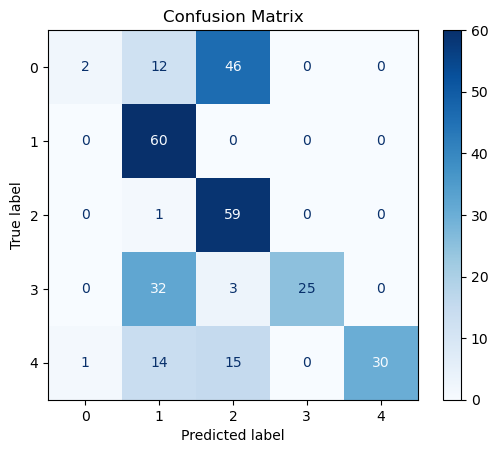

In [143]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if y_test.ndim == 1:
    y_true = y_test
else:
    y_true = np.argmax(y_test, axis=1)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### 1 Layer

In [288]:
# Define the 1D CNN Model

model = Sequential()

# Add 1 convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(5250,1)))
model.add(MaxPooling1D(pool_size=2))

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 3 classes
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.3172 - loss: 51.8868 - val_accuracy: 0.3071 - val_loss: 1.6562
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3961 - loss: 2.7729 - val_accuracy: 0.3143 - val_loss: 1.3446
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3766 - loss: 1.9615 - val_accuracy: 0.3071 - val_loss: 1.4257
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.4068 - loss: 1.7906 - val_accuracy: 0.3071 - val_loss: 1.3637
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3870 - loss: 1.6191 - val_accuracy: 0.3857 - val_loss: 1.3387
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3774 - loss: 1.6772 - val_accuracy: 0.3071 - val_loss: 1.3678
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.4078 - loss: 1.4535 - val_accuracy: 0.3143 - val_loss: 1.3353
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.4076 - loss: 1.3462 - val_accuracy: 0.3143 - val_loss: 1

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


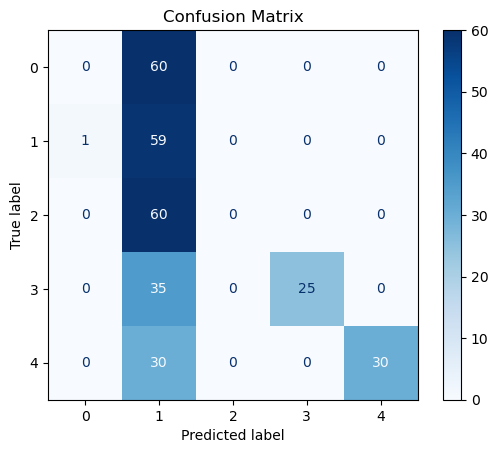

In [290]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if y_test.ndim == 1:
    y_true = y_test
else:
    y_true = np.argmax(y_test, axis=1)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### 250 Hz Run

In [292]:
X = wave_250.T.values
X = X.reshape((X.shape[0], X.shape[1], 1))
X.shape

(1000, 1750, 1)

In [294]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (700, 1750, 1), y_train shape: (700, 5)
X_test shape: (300, 1750, 1), y_test shape: (300, 5)


### 3 Layers

In [297]:
# Define the 1D CNN Model

model = Sequential()

# Add 3 convolutional layers
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(1750,1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 3 classes
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.2445 - loss: 4.2588 - val_accuracy: 0.5143 - val_loss: 1.3712
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.4761 - loss: 1.2752 - val_accuracy: 0.6000 - val_loss: 1.1783
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5893 - loss: 1.0716 - val_accuracy: 0.6500 - val_loss: 0.9522
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6800 - loss: 0.8218 - val_accuracy: 0.7214 - val_loss: 0.7544
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7466 - loss: 0.6612 - val_accuracy: 0.8143 - val_loss: 0.5849
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7753 - loss: 0.5463 - val_accuracy: 0.8071 - val_loss: 0.4611
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8332 - loss: 0.4328 - val_accuracy: 0.8571 - val_loss: 0.3632
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8566 - loss: 0.3899 - val_accuracy: 0.9429 - val_loss: 0.

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


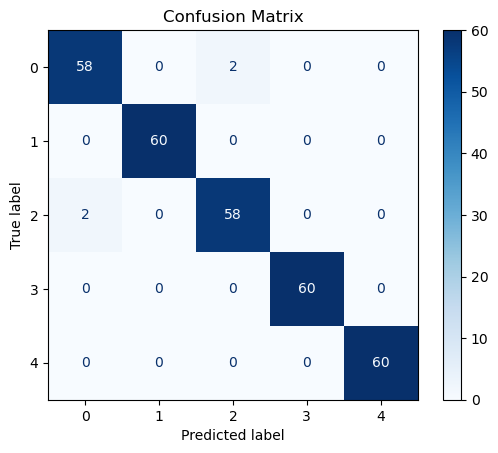

In [301]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if y_test.ndim == 1:
    y_true = y_test
else:
    y_true = np.argmax(y_test, axis=1)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### 2 Layers

In [303]:
# Define the 1D CNN Model

model = Sequential()

# Add 3 convolutional layers
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(1750,1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 3 classes
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.2670 - loss: 5.9900 - val_accuracy: 0.3429 - val_loss: 1.4081
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.3542 - loss: 1.3676 - val_accuracy: 0.5000 - val_loss: 1.3191
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4761 - loss: 1.2440 - val_accuracy: 0.5071 - val_loss: 1.2605
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5022 - loss: 1.1914 - val_accuracy: 0.6000 - val_loss: 1.2065
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5482 - loss: 1.0885 - val_accuracy: 0.5643 - val_loss: 1.1159
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6229 - loss: 1.0034 - val_accuracy: 0.6143 - val_loss: 0.9974
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5909 - loss: 0.9301 - val_accuracy: 0.6643 - val_loss: 0.8665
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6154 - loss: 0.8729 - val_accuracy: 0.6143 - val_loss: 0.

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


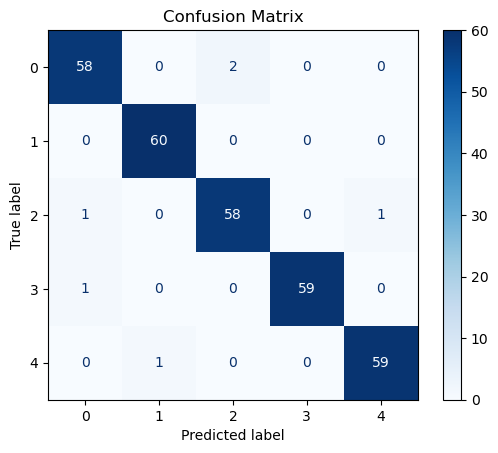

In [305]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if y_test.ndim == 1:
    y_true = y_test
else:
    y_true = np.argmax(y_test, axis=1)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### 1 Layer

In [308]:
# Define the 1D CNN Model

model = Sequential()

# Add 1 convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(1750,1)))
model.add(MaxPooling1D(pool_size=2))

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 3 classes
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3245 - loss: 10.3823 - val_accuracy: 0.3643 - val_loss: 1.3518
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3944 - loss: 1.7292 - val_accuracy: 0.2929 - val_loss: 1.3520
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4324 - loss: 1.4107 - val_accuracy: 0.5071 - val_loss: 1.3716
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4459 - loss: 1.4377 - val_accuracy: 0.5071 - val_loss: 1.2584
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4540 - loss: 1.1722 - val_accuracy: 0.5357 - val_loss: 1.2435
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5250 - loss: 1.1161 - val_accuracy: 0.5357 - val_loss: 1.2355
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5133 - loss: 1.1513 - val_accuracy: 0.5286 - val_loss: 1.2633
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5052 - loss: 1.1374 - val_accuracy: 0.5500 - val_loss: 1

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


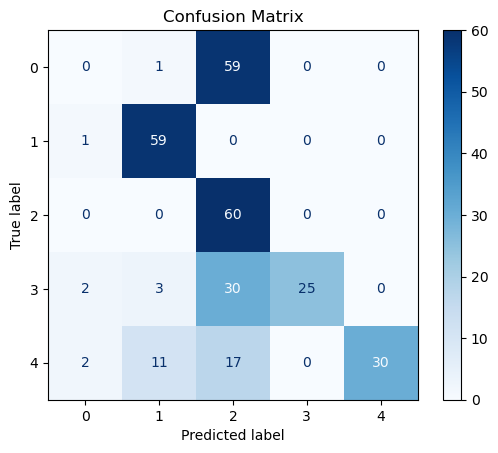

In [310]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if y_test.ndim == 1:
    y_true = y_test
else:
    y_true = np.argmax(y_test, axis=1)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### Generate 4000 of each class

In [315]:
# Create a tuple of tuples

# normal class
x_input_normal_1 = tuple(("N", "none",1) for _ in range(2000))
x_input_normal_2 = tuple(("N", "none",2) for _ in range(2000))

# bilateral hypometric class
x_input_hypo_1 = tuple(("A", "hypo",1) for _ in range(2000))
x_input_hypo_2 = tuple(("A", "hypo",2) for _ in range(2000))

# bilateral hypermetric class
x_input_hyper_1 = tuple(("A", "hyper",1) for _ in range(2000))
x_input_hyper_2 = tuple(("A", "hyper",2) for _ in range(2000))

x_input_list_one = np.concatenate((x_input_normal_1,x_input_normal_2,x_input_hypo_1,x_input_hypo_2,x_input_hyper_1,x_input_hyper_2))

In [317]:
# hypos on right & hypers on left
x_input_uni_1_1 = tuple(("A", "unilateral",1,1) for _ in range(2000))
x_input_uni_2_2 = tuple(("A", "unilateral",2,2) for _ in range(2000))

# hypers on right & hypos on left
x_input_uni_1_2 = tuple(("A", "unilateral",1,2) for _ in range(2000))
x_input_uni_2_1 = tuple(("A", "unilateral",2,1) for _ in range(2000))

In [319]:
#0 -> normal, 1-> bilateral hypo, 2 -> bilateral hyper, 3 -> hypo right & hyper left, 4 -> hyper right & hypo left
y_list = np.concatenate(([0]*4000, [1]*4000, [2]*4000,[3]*4000, [4]*4000))

In [321]:
wave_merged = pd.DataFrame(data=timesteps, columns=["timesteps"]).set_index("timesteps")
merged_wave = []
stim_df = pd.DataFrame(data=stim_time, columns=["timesteps"])
tensor_combined = torch.empty(0)
stim_combined = torch.empty(0)
mainseq_combined = torch.empty(0)
data = []

for i, row in enumerate(x_input_list_one):
    # generate stimulus
    stimulus = gen_target(left,right,row[-2])
    time, waveform, main_seq = gen_waveform(stimulus, *row)
    wave_df = make_df(time, waveform,i)
    wave_df = wave_df.iloc[:10500,:]
    if(len(wave_df.T.values[0]) != 10500):
        print("What the hell")
        print(i)
        print(len(wave_df.T.values[0]))
    data.append(wave_df.T.values[:-1])
    if i % 1000 == 0:
        print("we're going strong..")

for i, row in enumerate(x_input_uni_1_1):
    # generate stimulus
    stimulus = gen_target(left,right,row[-2])
    saccade_pattern = row[-1]
    time, waveform, main_seq = gen_unilateral(stimulus, *row[:-2], saccade_pattern)
    wave_df = make_df(time, waveform,i)
    wave_df = wave_df.iloc[:10500,:-1]
    if(len(wave_df.T.values[0]) != 10500):
        print("What the hell")
        print(i)
        print(len(wave_df.T.values[0]))
    data.append(wave_df.T.values)
    # generate waveform
    if i % 1000 == 0:
        print("we're going strong..")

for i, row in enumerate(x_input_uni_2_2):
    # generate stimulus
    stimulus = gen_target(left,right,row[-2])
    saccade_pattern = row[-1]
    time, waveform, main_seq = gen_unilateral(stimulus, *row[:-2], saccade_pattern)
    wave_df = make_df(time, waveform,i)
    wave_df = wave_df.iloc[:10500,:-1]
    if(len(wave_df.T.values[0]) != 10500):
        print("What the hell")
        print(i)
        print(len(wave_df.T.values[0]))
    data.append(wave_df.T.values)
    # generate waveform
    if i % 1000 == 0:
        print("we're going strong..")

for i, row in enumerate(x_input_uni_1_2):
    # generate stimulus
    stimulus = gen_target(left,right,row[-2])
    saccade_pattern = row[-1]
    time, waveform, main_seq = gen_unilateral(stimulus, *row[:-2], saccade_pattern)
    wave_df = make_df(time, waveform,i)
    wave_df = wave_df.iloc[:10500,:-1]
    if(len(wave_df.T.values[0]) != 10500):
        print("What the hell")
        print(i)
        print(len(wave_df.T.values[0]))
    data.append(wave_df.T.values)
    # generate waveform
    if i % 1000 == 0:
        print("we're going strong..")

for i, row in enumerate(x_input_uni_2_1):
    # generate stimulus
    stimulus = gen_target(left,right,row[-2])
    saccade_pattern = row[-1]
    time, waveform, main_seq = gen_unilateral(stimulus, *row[:-2], saccade_pattern)
    wave_df = make_df(time, waveform,i)
    wave_df = wave_df.iloc[:10500,:-1]
    if(len(wave_df.T.values[0]) != 10500):
        print("What the hell")
        print(i)
        print(len(wave_df.T.values[0]))
    data.append(wave_df.T.values)
    # generate waveform
    if i % 1000 == 0:
        print("we're going strong..")

we're going strong..
we're going strong..
we're going strong..
we're going strong..
we're going strong..
we're going strong..
we're going strong..
we're going strong..
we're going strong..
we're going strong..
we're going strong..
we're going strong..
we're going strong..
we're going strong..
we're going strong..
we're going strong..
we're going strong..
we're going strong..
we're going strong..
we're going strong..


In [325]:
transformed = np.array(data)
num_waves = np.shape(np.array(data))[0]
new = transformed.reshape(num_waves,10500)
wave_1000 = pd.DataFrame(new).T
wave_1000

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,-15.0,-7.5,-7.5,-10.0,-10.0,-15.0,-10.0,-7.5,-10.0,-2.5,...,-2.357614,-9.139682,-2.431487,-9.207276,-7.279334,-7.149963,-2.364232,-7.326982,-2.48715,-7.175452
10496,-15.0,-7.5,-7.5,-10.0,-10.0,-15.0,-10.0,-7.5,-10.0,-2.5,...,-2.357614,-9.139682,-2.431487,-9.207276,-7.279334,-7.149963,-2.364232,-7.326982,-2.48715,-7.175452
10497,-15.0,-7.5,-7.5,-10.0,-10.0,-15.0,-10.0,-7.5,-10.0,-2.5,...,-2.357614,-9.139682,-2.431487,-9.207276,-7.279334,-7.149963,-2.364232,-7.326982,-2.48715,-7.175452
10498,-15.0,-7.5,-7.5,-10.0,-10.0,-15.0,-10.0,-7.5,-10.0,-2.5,...,-2.357614,-9.139682,-2.431487,-9.207276,-7.279334,-7.149963,-2.364232,-7.326982,-2.48715,-7.175452


In [327]:
wave_500 = wave_1000[wave_1000.index % 2 != 0]  # Excludes every 2nd row starting from 0
wave_250 = wave_500[::3]  # Excludes every 2nd row starting from 0
wave_125 = wave_250[::2]  # Excludes every 2nd row starting from 0

### CNN Model Testing - 1000 Hz

In [328]:
X = wave_1000.T.values
X = X.reshape((X.shape[0], X.shape[1], 1))
X.shape

(20000, 10500, 1)

In [331]:
# Labels: 0 - normal, 1 - hypometria, 2 - hypermetria
y = to_categorical(y_list)  # Convert to one-hot encoding
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [333]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (14000, 10500, 1), y_train shape: (14000, 5)
X_test shape: (6000, 10500, 1), y_test shape: (6000, 5)


### 3 Layers

In [336]:
# Define the 1D CNN Model

model = Sequential()

# Add 3 convolutional layers
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(10500,1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 3 classes
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 74s 210ms/step - accuracy: 0.3506 - loss: 3.9820 - val_accuracy: 0.5743 - val_loss: 1.1229
Epoch 2/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 77s 218ms/step - accuracy: 0.4760 - loss: 1.1806 - val_accuracy: 0.6746 - val_loss: 1.0124
Epoch 3/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 78s 224ms/step - accuracy: 0.5089 - loss: 1.1156 - val_accuracy: 0.7582 - val_loss: 0.9316
Epoch 4/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 81s 232ms/step - accuracy: 0.5205 - loss: 1.0836 - val_accuracy: 0.6418 - val_loss: 0.9729
Epoch 5/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 80s 228ms/step - accuracy: 0.5189 - loss: 1.1086 - val_accuracy: 0.7711 - val_loss: 0.8722
Epoch 6/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 79s 227ms/step - accuracy: 0.5383 - loss: 1.0805 - val_accuracy: 0.7507 - val_loss: 0.8357
Epoch 7/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 83s 235ms/step - accuracy: 0.5361 - loss: 1.0791 - val_accuracy: 0.7793 - val_loss: 0.8632
Epoch 8/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 82s 235ms/step - accuracy: 0.5501 - loss: 1

188/188 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step


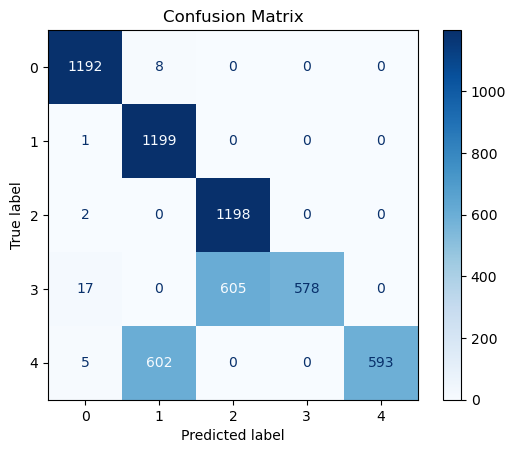

In [341]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if y_test.ndim == 1:
    y_true = y_test
else:
    y_true = np.argmax(y_test, axis=1)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### 2 Layers

In [344]:
# Define the 1D CNN Model

model = Sequential()

# Add 3 convolutional layers
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(10500,1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))


# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 3 classes
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 53s 149ms/step - accuracy: 0.3544 - loss: 7.3287 - val_accuracy: 0.4043 - val_loss: 1.2562
Epoch 2/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 54s 155ms/step - accuracy: 0.3892 - loss: 1.2748 - val_accuracy: 0.3971 - val_loss: 1.2450
Epoch 3/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 56s 158ms/step - accuracy: 0.3858 - loss: 1.2668 - val_accuracy: 0.3968 - val_loss: 1.2423
Epoch 4/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 56s 159ms/step - accuracy: 0.4016 - loss: 1.2537 - val_accuracy: 0.3971 - val_loss: 1.2410
Epoch 5/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 55s 157ms/step - accuracy: 0.3882 - loss: 1.2813 - val_accuracy: 0.3971 - val_loss: 1.2409
Epoch 6/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 56s 161ms/step - accuracy: 0.3821 - loss: 1.2754 - val_accuracy: 0.3971 - val_loss: 1.2410
Epoch 7/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 56s 161ms/step - accuracy: 0.3844 - loss: 1.2904 - val_accuracy: 0.3971 - val_loss: 1.2411
Epoch 8/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 56s 159ms/step - accuracy: 0.3611 - loss: 1

188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step


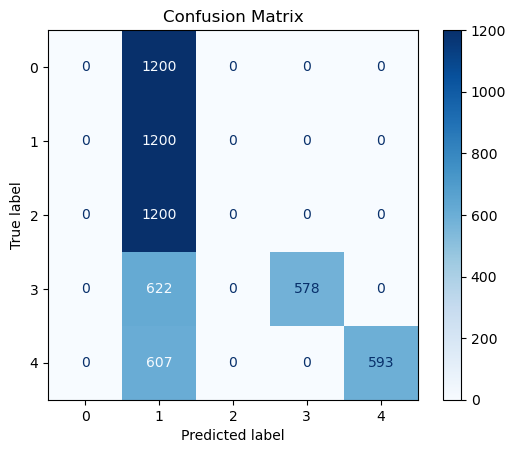

In [346]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if y_test.ndim == 1:
    y_true = y_test
else:
    y_true = np.argmax(y_test, axis=1)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### 1 Layer Run

In [349]:
# Define the 1D CNN Model

model = Sequential()

# Add 1 convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(10500,1)))
model.add(MaxPooling1D(pool_size=2))


# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 3 classes
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 36s 100ms/step - accuracy: 0.3489 - loss: 12.1842 - val_accuracy: 0.4046 - val_loss: 1.2556
Epoch 2/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 36s 102ms/step - accuracy: 0.3958 - loss: 1.2822 - val_accuracy: 0.3971 - val_loss: 1.2450
Epoch 3/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 35s 100ms/step - accuracy: 0.3918 - loss: 1.2659 - val_accuracy: 0.3968 - val_loss: 1.2420
Epoch 4/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 35s 99ms/step - accuracy: 0.3928 - loss: 1.2649 - val_accuracy: 0.3964 - val_loss: 1.2417
Epoch 5/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 34s 98ms/step - accuracy: 0.3922 - loss: 1.2615 - val_accuracy: 0.3971 - val_loss: 1.2411
Epoch 6/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 37s 107ms/step - accuracy: 0.3866 - loss: 1.2720 - val_accuracy: 0.3971 - val_loss: 1.2417
Epoch 7/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 36s 101ms/step - accuracy: 0.3842 - loss: 1.2789 - val_accuracy: 0.3971 - val_loss: 1.2407
Epoch 8/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 37s 106ms/step - accuracy: 0.3881 - loss: 1.

188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step


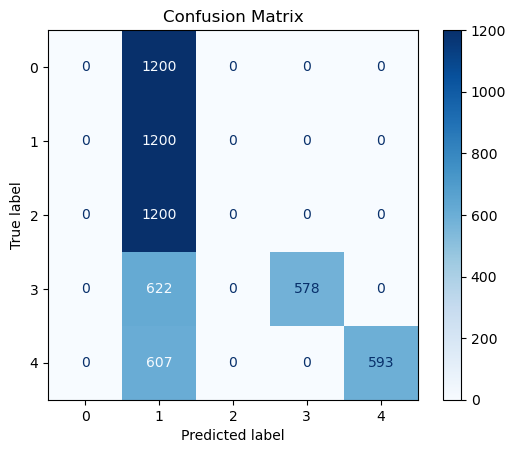

In [351]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if y_test.ndim == 1:
    y_true = y_test
else:
    y_true = np.argmax(y_test, axis=1)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### 500 Hz Model Run

### 3 Layers

In [354]:
X = wave_500.T.values
X = X.reshape((X.shape[0], X.shape[1], 1))
X.shape

(20000, 5250, 1)

In [355]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (14000, 5250, 1), y_train shape: (14000, 5)
X_test shape: (6000, 5250, 1), y_test shape: (6000, 5)


In [356]:
# Define the 1D CNN Model

model = Sequential()

# Add 3 convolutional layers
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(5250,1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 3 classes
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 38s 106ms/step - accuracy: 0.3520 - loss: 3.0213 - val_accuracy: 0.6254 - val_loss: 0.8574
Epoch 2/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 37s 106ms/step - accuracy: 0.4930 - loss: 1.0279 - val_accuracy: 0.7571 - val_loss: 0.7257
Epoch 3/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 37s 106ms/step - accuracy: 0.5066 - loss: 0.9863 - val_accuracy: 0.6743 - val_loss: 0.6231
Epoch 4/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 37s 107ms/step - accuracy: 0.5325 - loss: 0.9651 - val_accuracy: 0.7968 - val_loss: 0.6344
Epoch 5/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 37s 107ms/step - accuracy: 0.5427 - loss: 0.9479 - val_accuracy: 0.7993 - val_loss: 0.6438
Epoch 6/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 37s 107ms/step - accuracy: 0.5457 - loss: 0.9355 - val_accuracy: 0.7989 - val_loss: 0.6022
Epoch 7/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 38s 109ms/step - accuracy: 0.5373 - loss: 0.9561 - val_accuracy: 0.8004 - val_loss: 0.5936
Epoch 8/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 38s 109ms/step - accuracy: 0.5378 - loss: 0

188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step


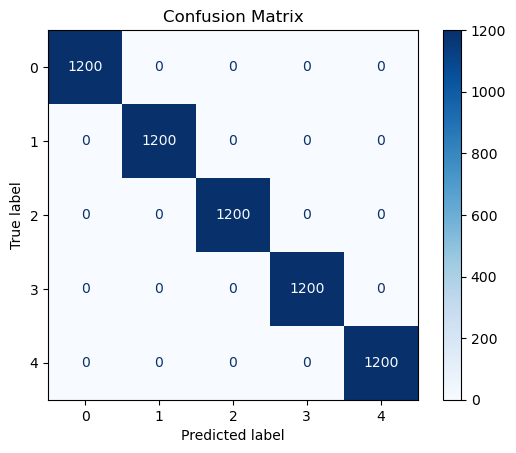

In [357]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if y_test.ndim == 1:
    y_true = y_test
else:
    y_true = np.argmax(y_test, axis=1)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### 2 Layers

In [359]:
# Define the 1D CNN Model

model = Sequential()

# Add 3 convolutional layers
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(5250,1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 3 classes
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - accuracy: 0.3450 - loss: 4.3633 - val_accuracy: 0.3971 - val_loss: 1.2575
Epoch 2/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - accuracy: 0.3945 - loss: 1.2726 - val_accuracy: 0.3971 - val_loss: 1.2455
Epoch 3/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - accuracy: 0.3966 - loss: 1.2614 - val_accuracy: 0.3971 - val_loss: 1.2420
Epoch 4/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - accuracy: 0.3789 - loss: 1.2844 - val_accuracy: 0.3971 - val_loss: 1.2411
Epoch 5/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 25s 71ms/step - accuracy: 0.3706 - loss: 1.3019 - val_accuracy: 0.3971 - val_loss: 1.2407
Epoch 6/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 26s 74ms/step - accuracy: 0.3735 - loss: 1.2862 - val_accuracy: 0.3971 - val_loss: 1.2408
Epoch 7/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 26s 75ms/step - accuracy: 0.3849 - loss: 1.2857 - val_accuracy: 0.3971 - val_loss: 1.2407
Epoch 8/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 26s 75ms/step - accuracy: 0.3924 - loss: 1.2752 - 

188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step


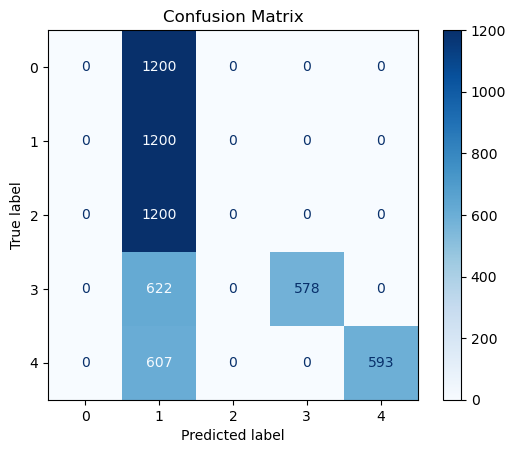

In [360]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if y_test.ndim == 1:
    y_true = y_test
else:
    y_true = np.argmax(y_test, axis=1)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### 1 Layer

In [362]:
# Define the 1D CNN Model

model = Sequential()

# Add 1 convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(5250,1)))
model.add(MaxPooling1D(pool_size=2))

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 3 classes
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.3575 - loss: 6.0826 - val_accuracy: 0.3968 - val_loss: 1.2562
Epoch 2/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.4011 - loss: 1.2669 - val_accuracy: 0.3971 - val_loss: 1.2447
Epoch 3/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 17s 48ms/step - accuracy: 0.3878 - loss: 1.2674 - val_accuracy: 0.3971 - val_loss: 1.2421
Epoch 4/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.3707 - loss: 1.2968 - val_accuracy: 0.3971 - val_loss: 1.2416
Epoch 5/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.3824 - loss: 1.2931 - val_accuracy: 0.3957 - val_loss: 1.2471
Epoch 6/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.3602 - loss: 1.3419 - val_accuracy: 0.3971 - val_loss: 1.2416
Epoch 7/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - accuracy: 0.3587 - loss: 1.3255 - val_accuracy: 0.3971 - val_loss: 1.2422
Epoch 8/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.3698 - loss: 1.3166 - 

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


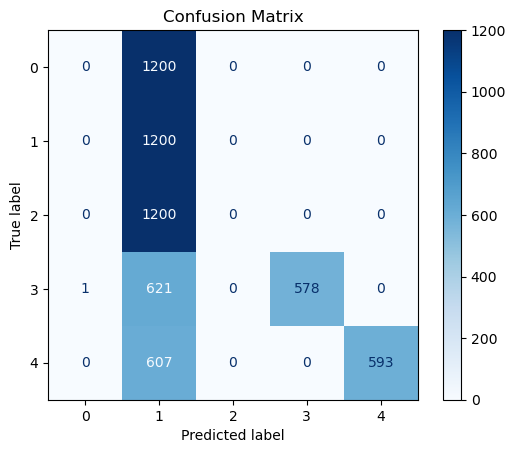

In [363]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if y_test.ndim == 1:
    y_true = y_test
else:
    y_true = np.argmax(y_test, axis=1)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### 250 Hz Run

In [365]:
X = wave_250.T.values
X = X.reshape((X.shape[0], X.shape[1], 1))
X.shape

(20000, 1750, 1)

In [366]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (14000, 1750, 1), y_train shape: (14000, 5)
X_test shape: (6000, 1750, 1), y_test shape: (6000, 5)


### 3 Layers

In [368]:
# Define the 1D CNN Model

model = Sequential()

# Add 3 convolutional layers
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(1750,1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 3 classes
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.6233 - loss: 1.1778 - val_accuracy: 1.0000 - val_loss: 0.0377
Epoch 2/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.9445 - loss: 0.1384 - val_accuracy: 0.9946 - val_loss: 0.0269
Epoch 3/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.9589 - loss: 0.1203 - val_accuracy: 1.0000 - val_loss: 7.0546e-04
Epoch 4/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.9760 - loss: 0.0731 - val_accuracy: 1.0000 - val_loss: 4.8487e-04
Epoch 5/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.9835 - loss: 0.0483 - val_accuracy: 1.0000 - val_loss: 7.2449e-04
Epoch 6/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.9863 - loss: 0.0443 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 7/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.9848 - loss: 0.0456 - val_accuracy: 1.0000 - val_loss: 1.6852e-05
Epoch 8/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.9792 -

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


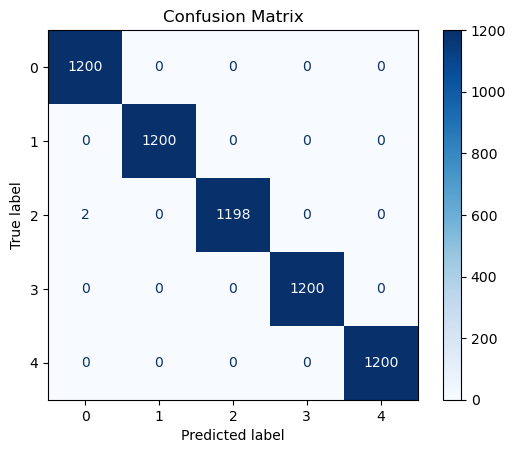

In [369]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if y_test.ndim == 1:
    y_true = y_test
else:
    y_true = np.argmax(y_test, axis=1)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### 2 Layers

In [371]:
# Define the 1D CNN Model

model = Sequential()

# Add 3 convolutional layers
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(1750,1)))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 3 classes
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


350/350 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.4629 - loss: 2.3513 - val_accuracy: 0.8936 - val_loss: 0.4811
Epoch 2/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.7198 - loss: 0.6452 - val_accuracy: 0.9929 - val_loss: 0.1740
Epoch 3/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7274 - loss: 0.5858 - val_accuracy: 0.9911 - val_loss: 0.1600
Epoch 4/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7212 - loss: 0.5290 - val_accuracy: 0.9911 - val_loss: 0.0857
Epoch 5/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7474 - loss: 0.4876 - val_accuracy: 0.9986 - val_loss: 0.0824
Epoch 6/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.7510 - loss: 0.4881 - val_accuracy: 0.9989 - val_loss: 0.0317
Epoch 7/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.7620 - loss: 0.4768 - val_accuracy: 0.9989 - val_loss: 0.0410
Epoch 8/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.7726 - loss: 0.4619 - val_accuracy: 0

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


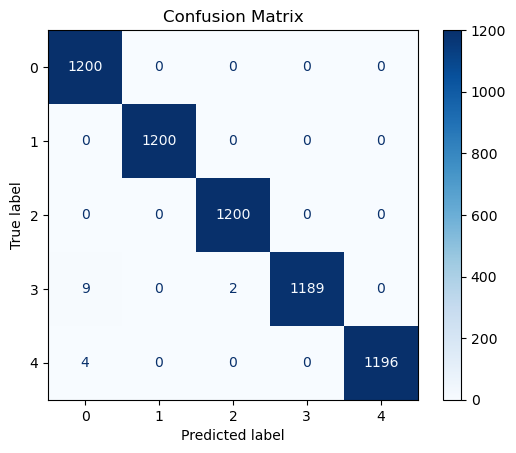

In [372]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if y_test.ndim == 1:
    y_true = y_test
else:
    y_true = np.argmax(y_test, axis=1)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### 1 Layer

In [374]:
# Define the 1D CNN Model

model = Sequential()

# Add 1 convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(1750,1)))
model.add(MaxPooling1D(pool_size=2))

# Flatten and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with 3 classes
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


350/350 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.3606 - loss: 4.2098 - val_accuracy: 0.4089 - val_loss: 1.2604
Epoch 2/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.3836 - loss: 1.2916 - val_accuracy: 0.3971 - val_loss: 1.2446
Epoch 3/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3921 - loss: 1.2595 - val_accuracy: 0.3971 - val_loss: 1.2419
Epoch 4/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3987 - loss: 1.2537 - val_accuracy: 0.3971 - val_loss: 1.2411
Epoch 5/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.3949 - loss: 1.2645 - val_accuracy: 0.3971 - val_loss: 1.2411
Epoch 6/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.3798 - loss: 1.2751 - val_accuracy: 0.3971 - val_loss: 1.2410
Epoch 7/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.3699 - loss: 1.2823 - val_accuracy: 0.3971 - val_loss: 1.2417
Epoch 8/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.3702 - loss: 1.2974 - val_accuracy: 0.39

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


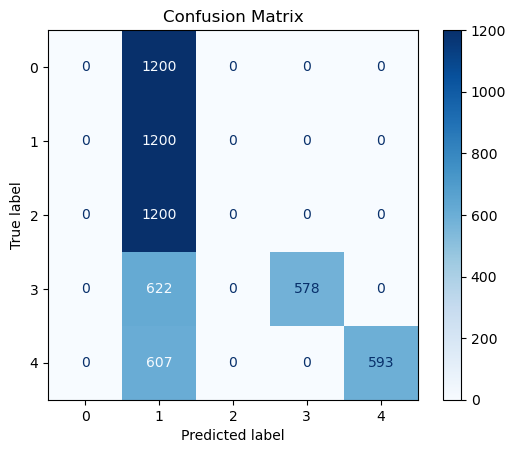

In [375]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

if y_test.ndim == 1:
    y_true = y_test
else:
    y_true = np.argmax(y_test, axis=1)

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### GradCAM Implementation